In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [2]:
def fit_classifier(alg, X_train, X_test, y_train, y_test):
      
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred_test, labels=None)
    met = {
        "ACC_train":  metrics.accuracy_score(y_pred_train, y_train),
        "ACC_test": metrics.accuracy_score(y_pred_test, y_test),
        "P_train":    metrics.precision_score(y_pred_train, y_train),
        "P_test":   metrics.precision_score(y_pred_test, y_test),
        "R_train":    metrics.recall_score(y_pred_train, y_train),
        "R_test":   metrics.recall_score(y_pred_test, y_test),
        "F1_train":   metrics.f1_score(y_pred_train, y_train),
        "F1_test":  metrics.f1_score(y_pred_test, y_test)
        }
    return met, cm

In [3]:
heart_failure_data = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_failure_data = heart_failure_data.drop(columns = 'time')
heart_failure_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [4]:
X = heart_failure_data.iloc[:, :-1]

In [5]:
y = heart_failure_data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [6]:
X, y = SMOTE().fit_resample(X, y)
m = X.mean()
s = X.std()
X_std = (X - m)/s
X_std.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.058845,-0.764522,0.030254,-0.732498,-1.454919,1.532831,0.068170,0.344405,-1.460079,0.830640,-0.589897
1,-0.608236,-0.764522,8.341983,-0.732498,0.109611,-0.650781,0.050630,-0.387250,-0.033383,0.830640,-0.589897
2,0.225304,-0.764522,-0.467605,-0.732498,-1.454919,-0.650781,-1.032106,-0.204336,-1.697862,0.830640,1.691037
3,-1.025006,1.304785,-0.507570,-0.732498,-1.454919,-0.650781,-0.519356,0.344405,0.204399,0.830640,-0.589897
4,0.225304,1.304785,-0.451618,1.361828,-1.454919,-0.650781,0.730472,1.076060,-4.789036,-1.200926,-0.589897


In [7]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
401,67.773488,1,121,0,27,0,274384.228400,1.019211,139,1,0
402,83.698167,0,65,0,32,0,200849.083636,1.391044,132,1,1
403,71.363653,1,126,0,53,0,355636.421190,2.036373,135,0,0
404,65.782971,1,109,0,31,0,388735.376264,3.590528,135,1,0


In [33]:
y.value_counts()

DEATH_EVENT
1    203
0    203
Name: count, dtype: int64

In [9]:
heart_failure_data_without_outl = pd.read_csv("data/heart_failure_data_without_outl.csv")
heart_failure_data_without_outl = heart_failure_data_without_outl.drop(columns = 'time')
heart_failure_data_without_outl.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.972621,0.435714,456.725000,0.417857,37.835714,0.360714,258820.066536,1.275393,136.825000,0.653571,0.314286,0.307143
std,11.815337,0.496738,537.107566,0.494089,11.470461,0.481068,85605.349916,0.615743,3.924203,0.476684,0.465062,0.462135
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,114.500000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,239.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,2794.000000,1.000000,65.000000,1.000000,543000.000000,4.400000,148.000000,1.000000,1.000000,1.000000


In [10]:
X_outl = heart_failure_data_without_outl.iloc[:, :-1]
m = X_outl.mean()
s = X_outl.std()
X_outl_std = (X_outl - m)/s
X_outl_std.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.187218,-0.877151,0.233240,-0.845711,-1.554926,1.32889,0.072191,1.014397,-1.739206,0.726747,-0.675793
1,0.340860,-0.877151,-0.578515,-0.845711,-1.554926,-0.74982,-1.131005,0.039963,-1.994035,0.726747,1.474458
2,-0.928676,1.135983,-0.643679,-0.845711,-1.554926,-0.74982,-0.570292,1.014397,0.044595,0.726747,-0.675793
3,2.456754,1.135983,-0.762836,-0.845711,0.188683,1.32889,-0.640381,1.339208,-1.229549,0.726747,1.474458
4,1.187218,1.135983,-0.392333,-0.845711,-1.990828,-0.74982,-1.539858,-0.122442,0.044595,0.726747,-0.675793


In [11]:
y_outl = heart_failure_data_without_outl.iloc[:, -1]
y_outl.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [12]:
#Create train and validation datasets for default data and the one without outliers
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_std_train, X_std_val, y_std_train, y_std_val = train_test_split(X_std, y, test_size = 0.2)
X_outl_train, X_outl_val, y_outl_train, y_outl_val = train_test_split(X_outl, y_outl, test_size = 0.2)
X_outl_std_train, X_outl_std_val, y_outl_std_train, y_outl_std_val = train_test_split(X_outl_std, y_outl, test_size = 0.2)

In [13]:
#kNN model

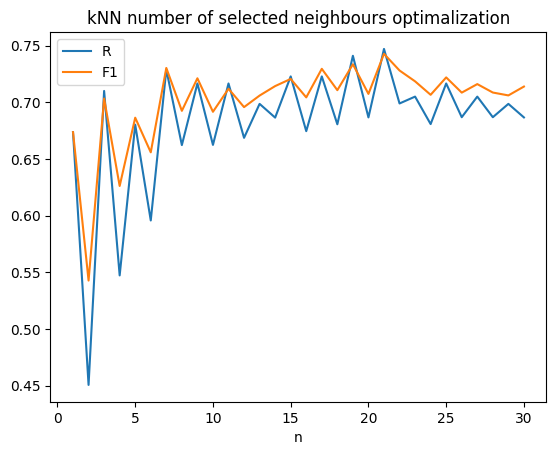

,R,F1
21,0.747059,0.742717


In [14]:
kNN_opt = pd.DataFrame()

for i in range(1,31):
    cv = cross_validate(KNeighborsClassifier(n_neighbors=i), X_std_train, y_std_train, cv=5, scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    kNN_opt = pd.concat([met_opt, kNN_opt])
    
kNN_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("kNN number of selected neighbours optimalization")
plt.show()
kNN_opt.loc[kNN_opt['F1'] == kNN_opt['F1'].max()]

In [15]:
params = ["knn n=3"]
met, cm = fit_classifier(KNeighborsClassifier(n_neighbors = 3), X_std_train, X_std_val, y_std_train, y_std_val)
df_results = pd.DataFrame(met, index=params)
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
knn n=3,0.842593,0.719512,0.873494,0.837838,0.828571,0.645833,0.85044,0.729412


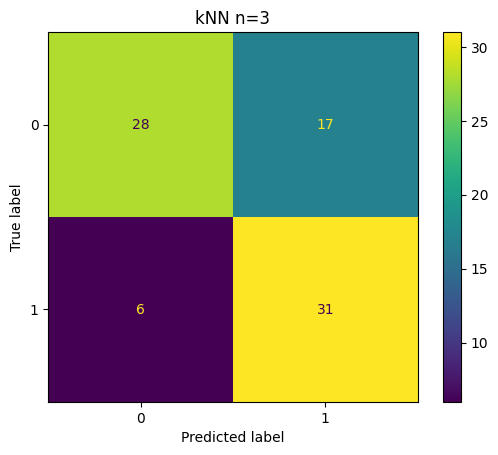

In [16]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("kNN n=3")
plt.show()

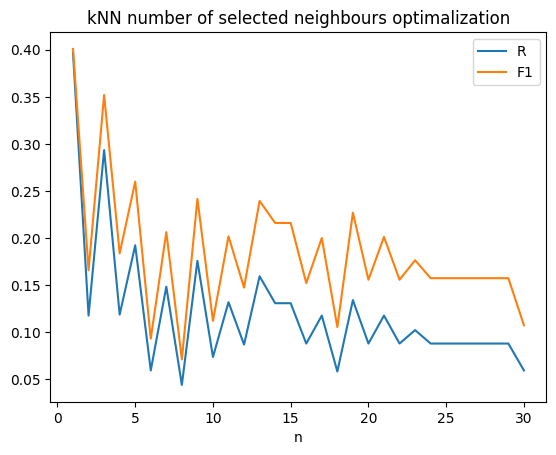

,R,F1
1,0.396703,0.400901


In [17]:
kNN_opt = pd.DataFrame()

for i in range(1,31):
    cv = cross_validate(KNeighborsClassifier(n_neighbors=i), X_outl_std_train, y_outl_std_train, cv=5, 
                        scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    kNN_opt = pd.concat([met_opt, kNN_opt])
    
kNN_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("kNN number of selected neighbours optimalization")
plt.show()
kNN_opt.loc[kNN_opt['F1'] == kNN_opt['F1'].max()]

In [18]:
met, cm = fit_classifier(KNeighborsClassifier(n_neighbors = 3), X_outl_std_train, X_outl_std_val, 
                         y_outl_std_train, y_outl_std_val)
res = pd.DataFrame(met, index = ["knn with outl n=3"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
knn with outl n=3,0.790179,0.678571,0.529412,0.388889,0.705882,0.500000,0.605042,0.437500
knn n=3,0.842593,0.719512,0.873494,0.837838,0.828571,0.645833,0.850440,0.729412


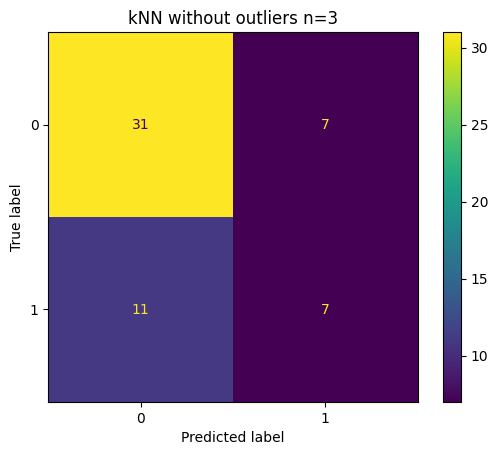

In [19]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("kNN without outliers n=3")
plt.show()

In [20]:
#Random forest model

In [21]:
cv = cross_validate(RandomForestClassifier(), X_std_train, y_std_train, cv=5, scoring = ['recall', 'f1'])
print('recall score:', cv['test_recall'].mean().round(4),'\n' 
      'f1 score:', cv['test_f1'].mean().round(4))

recall score: 0.7955 
f1 score: 0.7921


In [22]:
met, cm = fit_classifier(RandomForestClassifier(), X_std_train, X_std_val, y_std_train, y_std_val)
res = pd.DataFrame(met, index = ["Random Forest"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
Random Forest,1.000000,0.865854,1.000000,0.918919,1.000000,0.809524,1.000000,0.860759
knn with outl n=3,0.790179,0.678571,0.529412,0.388889,0.705882,0.500000,0.605042,0.437500
knn n=3,0.842593,0.719512,0.873494,0.837838,0.828571,0.645833,0.850440,0.729412


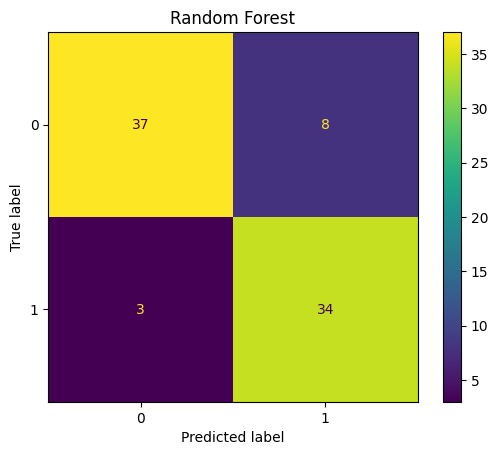

In [23]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest")
plt.show()

In [24]:
cv = cross_validate(RandomForestClassifier(), X_outl_std_train, y_outl_std_train, cv=5, scoring = ['recall', 'f1'])
print('recall score:', cv['test_recall'].mean().round(4),'\n' 
      'f1 score:', cv['test_f1'].mean().round(4))

recall score: 0.3989 
f1 score: 0.4525


In [25]:
met, cm = fit_classifier(RandomForestClassifier(), X_outl_std_train, X_outl_std_val, 
                         y_outl_std_train, y_outl_std_val)
res = pd.DataFrame(met, index = ["Random Forest without outliers"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
Random Forest without outliers,1.000000,0.785714,1.000000,0.555556,1.000000,0.714286,1.000000,0.625000
Random Forest,1.000000,0.865854,1.000000,0.918919,1.000000,0.809524,1.000000,0.860759
knn with outl n=3,0.790179,0.678571,0.529412,0.388889,0.705882,0.500000,0.605042,0.437500
knn n=3,0.842593,0.719512,0.873494,0.837838,0.828571,0.645833,0.850440,0.729412


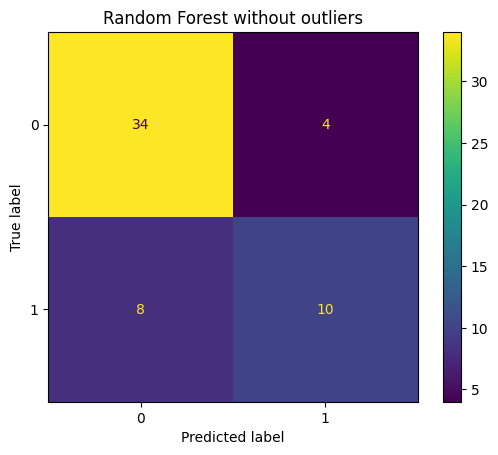

In [26]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest without outliers")
plt.show()

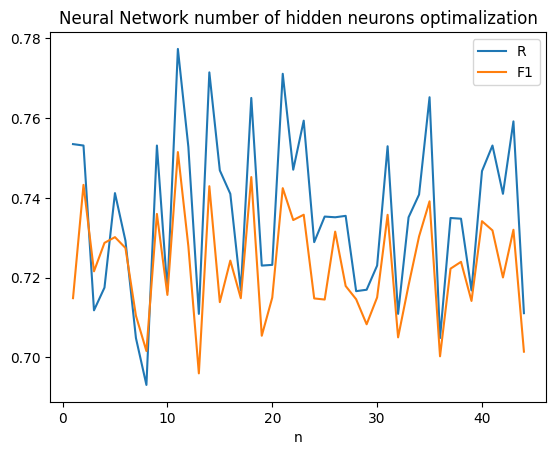

,R,F1
11,0.777362,0.751481


In [27]:
NNet_opt = pd.DataFrame()

for i in range(1,45):
    cv = cross_validate(MLPClassifier(hidden_layer_sizes=(i,), max_iter = 4000), X_std_train, y_std_train, cv=5, 
                        scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    NNet_opt = pd.concat([met_opt, NNet_opt])
    
NNet_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("Neural Network number of hidden neurons optimalization")
plt.show()
NNet_opt.loc[NNet_opt['F1'] == NNet_opt['F1'].max()]

In [28]:
met, cm = fit_classifier(MLPClassifier(hidden_layer_sizes=(41,), max_iter = 4000), X_std_train, X_std_val, 
                         y_std_train, y_std_val)
res = pd.DataFrame(met, index = ["NNet hidden = 41"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
NNet hidden = 41,0.993827,0.780488,0.993976,0.783784,0.993976,0.743590,0.993976,0.763158
Random Forest without outliers,1.000000,0.785714,1.000000,0.555556,1.000000,0.714286,1.000000,0.625000
Random Forest,1.000000,0.865854,1.000000,0.918919,1.000000,0.809524,1.000000,0.860759
knn with outl n=3,0.790179,0.678571,0.529412,0.388889,0.705882,0.500000,0.605042,0.437500
knn n=3,0.842593,0.719512,0.873494,0.837838,0.828571,0.645833,0.850440,0.729412


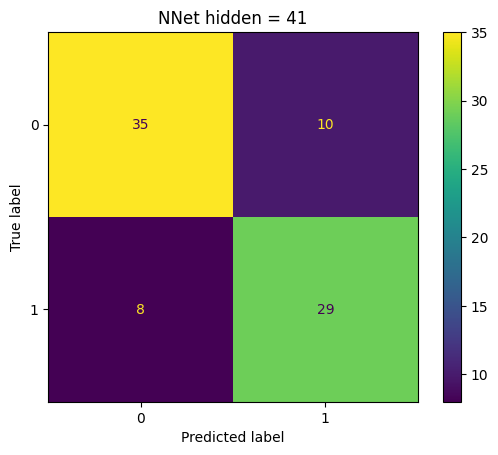

In [29]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("NNet hidden = 41")
plt.show()

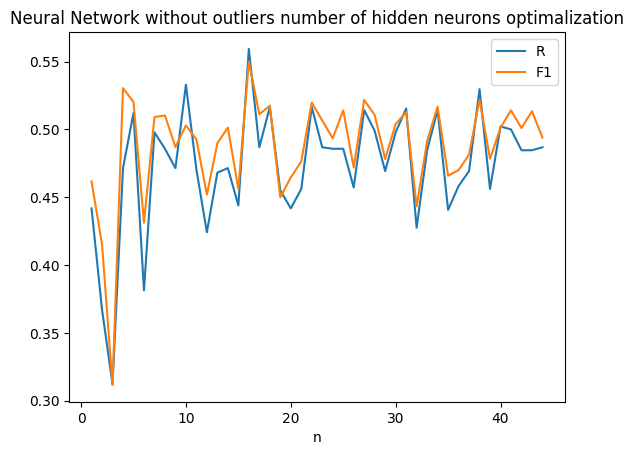

,R,F1
16,0.559341,0.549975


In [30]:
NNet_opt = pd.DataFrame()

for i in range(1,45):
    cv = cross_validate(MLPClassifier(hidden_layer_sizes=(i,), max_iter = 4000), X_outl_std_train, y_outl_std_train, cv=5, 
                        scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    NNet_opt = pd.concat([met_opt, NNet_opt])
    
NNet_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("Neural Network without outliers number of hidden neurons optimalization")
plt.show()
NNet_opt.loc[NNet_opt['F1'] == NNet_opt['F1'].max()]

In [31]:
met, cm = fit_classifier(MLPClassifier(hidden_layer_sizes=(23,), max_iter = 4000), X_outl_std_train, X_outl_std_val, 
                         y_outl_std_train, y_outl_std_val)
res = pd.DataFrame(met, index = ["NNet without outliers hidden = 23"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
NNet without outliers hidden = 23,0.991071,0.732143,0.985294,0.500000,0.985294,0.600000,0.985294,0.545455
NNet hidden = 41,0.993827,0.780488,0.993976,0.783784,0.993976,0.743590,0.993976,0.763158
Random Forest without outliers,1.000000,0.785714,1.000000,0.555556,1.000000,0.714286,1.000000,0.625000
Random Forest,1.000000,0.865854,1.000000,0.918919,1.000000,0.809524,1.000000,0.860759
knn with outl n=3,0.790179,0.678571,0.529412,0.388889,0.705882,0.500000,0.605042,0.437500
knn n=3,0.842593,0.719512,0.873494,0.837838,0.828571,0.645833,0.850440,0.729412


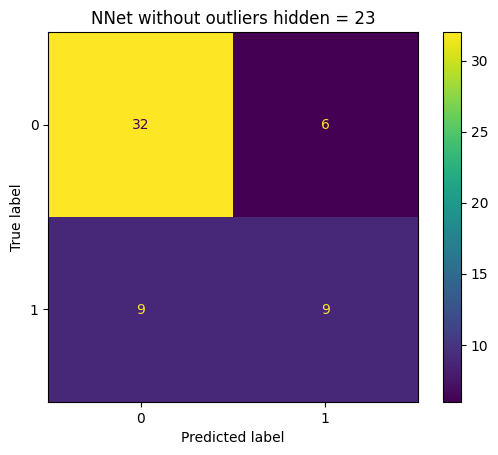

In [32]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("NNet without outliers hidden = 23")
plt.show()